<a href="https://colab.research.google.com/github/AnuruddhaPaul/ADV_PROG/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
### Datasets:
- **Dataset 1:** `digital_learning_analytics_100k.csv` (100,000 rows × 43 cols)
- **Dataset 2:** `drug_dataset_20k.csv` (20,000 rows × 10 cols)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

---
## Question 1 — Load Dataset, Display Basic Info

### Dataset 1: Digital Learning Analytics

In [ ]:
# Load Dataset 1
df1 = pd.read_csv('digital_learning_analytics_100k.csv')

print("--- First 5 Rows ---")
display(df1.head())

print("\n--- Dataset Shape ---")
print(f"Rows: {df1.shape[0]}, Columns: {df1.shape[1]}")

print("\n--- Column Names ---")
print(df1.columns.tolist())

print("\n--- Detailed Dataset Info ---")
df1.info()

--- First 5 Rows ---


learner_id  age      gender           education_level        country  \
0  LRN00000001   28  Non-binary                  Graduate      Australia   
1  LRN00000002   33        Male                  Graduate  United States   
2  LRN00000003   20        Male  Professional Certificate          India   
3  LRN00000004   27      Female                  Doctoral   South Africa   
4  LRN00000005   50        Male              Some College        Germany   

    employment_status  prior_online_courses  digital_literacy_score  \
0             Student                     0                    8.04   
1             Retired                     7                    7.07   
2  Employed Full-time                     6                    7.79   
3       Self-employed                     5                    7.24   
4          Unemployed                     5                    4.77   

        app_category  daily_app_minutes  ...  \
0          Test Prep               85.0  ...   
1        Mathematics               54.2  ...   
2  Language Learning               53.4  ...   
3          Test Prep               60.3  ...   
4        Soft Skills               31.8  ...   

   content_recommendations_followed  knowledge_gaps_identified  \
0                              47.5                          2   
1                              35.9                         10   
2                              40.6                          4   
3                              42.5                          0   
4                              47.4                          2   

   remediation_modules_completed  time_to_mastery_hours  mastery_score  \
0                              0                   21.0           44.2   
1                              2                   22.4           13.0   
2                              0                   70.5           43.2   
3                              0                   39.1           44.6   
4                              0                   52.6           35.1   

   learning_efficiency_score enrollment_date  last_activity_date  \
0                      21.05      2022-07-03          2022-07-16   
1                       5.80      2024-09-24          2024-10-17   
2                       6.13      2022-03-25          2022-04-04   
3                      11.41      2025-01-13          2025-02-04   
4                       6.67      2024-09-27          2024-11-01   

   total_learning_hours  engagement_consistency  
0                  34.2                   0.527  
1                  34.9                   0.441  
2                  37.8                   0.494  
3                  41.7                   0.493  
4                  36.9                   0.305  

[5 rows x 43 columns]


--- Dataset Shape ---
Rows: 100000, Columns: 43

--- Column Names ---
['learner_id', 'age', 'gender', 'education_level', 'country', 'employment_status', 'prior_online_courses', 'digital_literacy_score', 'app_category', 'daily_app_minutes', 'session_count_weekly', 'app_completion_rate', 'in_app_quiz_score', 'gamification_engagement', 'skill_pre_score', 'skill_post_score', 'essay_topic_category', 'essay_word_count', 'essay_grammar_errors', 'essay_vocabulary_richness', 'essay_coherence_score', 'human_grader_score', 'automated_score', 'mooc_platform', 'course_category', 'course_duration_weeks', 'video_completion_pct', 'assignment_submission_rate', 'forum_posts', 'peer_review_given', 'course_completed', 'learning_path_type', 'content_difficulty_avg', 'content_recommendations_followed', 'knowledge_gaps_identified', 'remediation_modules_completed', 'time_to_mastery_hours', 'mastery_score', 'learning_efficiency_score', 'enrollment_date', 'last_activity_date', 'total_learning_hours', 'engageme

### Dataset 2: Drug Dataset

In [ ]:
# Load Dataset 2
df2 = pd.read_csv('drug_dataset_20k.csv')

print("--- First 5 Rows ---")
display(df2.head())

print("\n--- Dataset Shape ---")
print(f"Rows: {df2.shape[0]}, Columns: {df2.shape[1]}")

print("\n--- Column Names ---")
print(df2.columns.tolist())

print("\n--- Detailed Dataset Info ---")
df2.info()

--- First 5 Rows ---


Age Sex      BP Cholesterol  Na_to_K   BMI Smoker Exercise_Level  \
0   23   F    HIGH        HIGH   25.355  30.7     No            Low   
1   47   M     LOW        HIGH   13.093  20.8     No       Moderate   
2   47   M     LOW        HIGH   10.114  23.8     No       Moderate   
3   28   F  NORMAL        HIGH    7.798  25.6     No           High   
4   61   F     LOW        HIGH   18.043  21.4     No            Low   

   Treatment_Duration_Days   Drug  
0                      176  DrugY  
1                       54  drugC  
2                       60  drugC  
3                        7  drugX  
4                      187  DrugY


--- Dataset Shape ---
Rows: 20000, Columns: 10

--- Column Names ---
['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'BMI', 'Smoker', 'Exercise_Level', 'Treatment_Duration_Days', 'Drug']

--- Detailed Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20000 non-null  int64  
 1   Sex                      20000 non-null  object 
 2   BP                       20000 non-null  object 
 3   Cholesterol              20000 non-null  object 
 4   Na_to_K                  20000 non-null  float64
 5   BMI                      20000 non-null  float64
 6   Smoker                   20000 non-null  object 
 7   Exercise_Level           20000 non-null  object 
 8   Treatment_Duration_Days  20000 non-null  int64  
 9   Drug                     20000 non-null  object 
dtypes: float64(2), int64

---
## Question 2 — Missing Value Detection & Treatment

### Dataset 1: Digital Learning Analytics

In [ ]:
df1_mv = df1.copy()

# Check missing values in each column
print("--- Missing Values Per Column ---")
missing = df1_mv.isnull().sum()
missing_pct = (df1_mv.isnull().sum() / len(df1_mv)) * 100
missing_report = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
display(missing_report[missing_report['Missing Count'] > 0])

# Replace missing numerical values using mean imputation
num_cols_with_na = df1_mv.select_dtypes(include='number').columns[
    df1_mv.select_dtypes(include='number').isnull().any()
]
print(f"\n--- Mean Imputation Applied To: {list(num_cols_with_na)} ---")
for col in num_cols_with_na:
    df1_mv[col].fillna(df1_mv[col].mean(), inplace=True)

print(f"\nShape after mean imputation: {df1_mv.shape}")
print(f"Remaining missing values: {df1_mv.isnull().sum().sum()}")

# Drop rows containing any remaining null values
df1_mv.dropna(inplace=True)
print(f"Shape after dropping rows with nulls: {df1_mv.shape}")

--- Missing Values Per Column ---


Missing Count  Missing %
gamification_engagement                    2490      2.490
essay_vocabulary_richness                  1973      1.973
essay_coherence_score                      2022      2.022
forum_posts                                2967      2.967
peer_review_given                          4153      4.153
content_recommendations_followed           1514      1.514
learning_efficiency_score                   973      0.973


--- Mean Imputation Applied To: ['gamification_engagement', 'essay_vocabulary_richness', 'essay_coherence_score', 'forum_posts', 'peer_review_given', 'content_recommendations_followed', 'learning_efficiency_score'] ---

Shape after mean imputation: (100000, 43)
Remaining missing values: 0
Shape after dropping rows with nulls: (100000, 43)


### Dataset 2: Drug Dataset

In [ ]:
df2_mv = df2.copy()

# Check missing values in each column
print("--- Missing Values Per Column ---")
missing2 = df2_mv.isnull().sum()
missing2_pct = (df2_mv.isnull().sum() / len(df2_mv)) * 100
missing2_report = pd.DataFrame({'Missing Count': missing2, 'Missing %': missing2_pct})
display(missing2_report)

# Replace missing numerical values using mean imputation
num_cols2_na = df2_mv.select_dtypes(include='number').columns[
    df2_mv.select_dtypes(include='number').isnull().any()
]
if len(num_cols2_na) > 0:
    print(f"\n--- Mean Imputation Applied To: {list(num_cols2_na)} ---")
    for col in num_cols2_na:
        df2_mv[col].fillna(df2_mv[col].mean(), inplace=True)
else:
    print("\nNo numerical columns with missing values found.")

# Drop rows containing null values
df2_mv.dropna(inplace=True)
print(f"Shape after treatment: {df2_mv.shape}")
print(f"Total missing values remaining: {df2_mv.isnull().sum().sum()}")

--- Missing Values Per Column ---


Missing Count  Missing %
Age                                  0        0.0
Sex                                  0        0.0
BP                                   0        0.0
Cholesterol                          0        0.0
Na_to_K                              0        0.0
BMI                                  0        0.0
Smoker                               0        0.0
Exercise_Level                       0        0.0
Treatment_Duration_Days              0        0.0
Drug                                 0        0.0


No numerical columns with missing values found.
Shape after treatment: (20000, 10)
Total missing values remaining: 0


---
## Question 3 — Independent & Dependent Variable Extraction using `.iloc[]`

### Dataset 1: Digital Learning Analytics
- **Dependent variable (y):** `course_completed` (last binary column, col index 30)
- **Independent variables (X):** All numerical columns except the target

In [ ]:
df1_clean = df1_mv.copy()

# Select only numeric columns for iloc-based extraction
df1_num = df1_clean.select_dtypes(include='number')

# Independent variables (X): all columns except last numeric col
X1 = df1_num.iloc[:, :-1]

# Dependent variable (y): last numeric column (learning_efficiency_score)
y1 = df1_num.iloc[:, -1]

print(f"X1 (Independent Variables) shape: {X1.shape}")
print(f"X1 columns: {X1.columns.tolist()}")
print(f"\ny1 (Dependent Variable) name: {y1.name}")
print(f"y1 shape: {y1.shape}")
display(X1.head(3))
print(y1.head(3))

X1 (Independent Variables) shape: (100000, 29)
X1 columns: ['age', 'prior_online_courses', 'digital_literacy_score', 'daily_app_minutes', 'session_count_weekly', 'app_completion_rate', 'in_app_quiz_score', 'gamification_engagement', 'skill_pre_score', 'skill_post_score', 'essay_word_count', 'essay_grammar_errors', 'essay_vocabulary_richness', 'essay_coherence_score', 'human_grader_score', 'automated_score', 'course_duration_weeks', 'video_completion_pct', 'assignment_submission_rate', 'forum_posts', 'peer_review_given', 'content_difficulty_avg', 'content_recommendations_followed', 'knowledge_gaps_identified', 'remediation_modules_completed', 'time_to_mastery_hours', 'mastery_score', 'learning_efficiency_score', 'total_learning_hours']

y1 (Dependent Variable) name: engagement_consistency
y1 shape: (100000,)


age  prior_online_courses  digital_literacy_score  daily_app_minutes  \
0   28                     0                    8.04               85.0   
1   33                     7                    7.07               54.2   
2   20                     6                    7.79               53.4   

   session_count_weekly  app_completion_rate  in_app_quiz_score  \
0                     9                 71.9               67.2   
1                     8                 73.8               74.5   
2                     2                 54.0               74.1   

   gamification_engagement  skill_pre_score  skill_post_score  ...  \
0                     13.3             28.7              50.9  ...   
1                      7.2             66.2              76.1  ...   
2                     31.0             65.6              81.0  ...   

   forum_posts  peer_review_given  content_difficulty_avg  \
0          0.0                1.0                    2.49   
1          0.0                0.0                    3.31   
2          2.0                0.0                    2.74   

   content_recommendations_followed  knowledge_gaps_identified  \
0                              47.5                          2   
1                              35.9                         10   
2                              40.6                          4   

   remediation_modules_completed  time_to_mastery_hours  mastery_score  \
0                              0                   21.0           44.2   
1                              2                   22.4           13.0   
2                              0                   70.5           43.2   

   learning_efficiency_score  total_learning_hours  
0                      21.05                  34.2  
1                       5.80                  34.9  
2                       6.13                  37.8  

[3 rows x 29 columns]

0    0.527
1    0.441
2    0.494
Name: engagement_consistency, dtype: float64


### Dataset 2: Drug Dataset
- **Dependent variable (y):** `Drug` (target, col index -1)
- **Independent variables (X):** All other columns

In [ ]:
df2_clean = df2_mv.copy()

# Independent variables (X): all columns except last
X2 = df2_clean.iloc[:, :-1]

# Dependent variable (y): last column (Drug)
y2 = df2_clean.iloc[:, -1]

print(f"X2 (Independent Variables) shape: {X2.shape}")
print(f"X2 columns: {X2.columns.tolist()}")
print(f"\ny2 (Dependent Variable) name: {y2.name}")
print(f"y2 shape: {y2.shape}")
display(X2.head(3))
print(y2.head(3))

X2 (Independent Variables) shape: (20000, 9)
X2 columns: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'BMI', 'Smoker', 'Exercise_Level', 'Treatment_Duration_Days']

y2 (Dependent Variable) name: Drug
y2 shape: (20000,)


Age Sex    BP Cholesterol  Na_to_K   BMI Smoker Exercise_Level  \
0   23   F  HIGH        HIGH   25.355  30.7     No            Low   
1   47   M   LOW        HIGH   13.093  20.8     No       Moderate   
2   47   M   LOW        HIGH   10.114  23.8     No       Moderate   

   Treatment_Duration_Days  
0                      176  
1                       54  
2                       60

0    DrugY
1    drugC
2    drugC
Name: Drug, dtype: object


---
## Question 4 — Encode Categorical Variables

### Dataset 1: Digital Learning Analytics

In [ ]:
df1_enc = df1_clean.copy()

# --- LabelEncoder on 'gender' column ---
le = LabelEncoder()
df1_enc['gender_encoded'] = le.fit_transform(df1_enc['gender'])
print("--- LabelEncoder on 'gender' ---")
print("Classes:", le.classes_)
display(df1_enc[['gender', 'gender_encoded']].head(5))

# --- OneHotEncoder on 'education_level' column ---
ohe = OneHotEncoder(sparse_output=False)
edu_encoded = ohe.fit_transform(df1_enc[['education_level']])
edu_cols = ohe.get_feature_names_out(['education_level'])
df1_ohe = pd.DataFrame(edu_encoded, columns=edu_cols, index=df1_enc.index)
df1_enc = pd.concat([df1_enc, df1_ohe], axis=1)

print("\n--- OneHotEncoder on 'education_level' ---")
print("New dummy columns:", list(edu_cols))
display(df1_enc[['education_level'] + list(edu_cols)].head(5))

--- LabelEncoder on 'gender' ---
Classes: ['Female' 'Male' 'Non-binary' 'Prefer not to say']


gender  gender_encoded
0  Non-binary               2
1        Male               1
2        Male               1
3      Female               0
4        Male               1


--- OneHotEncoder on 'education_level' ---
New dummy columns: ['education_level_Doctoral', 'education_level_Graduate', 'education_level_High School', 'education_level_Professional Certificate', 'education_level_Some College', 'education_level_Undergraduate']


education_level  education_level_Doctoral  \
0                  Graduate                       0.0   
1                  Graduate                       0.0   
2  Professional Certificate                       0.0   
3                  Doctoral                       1.0   
4              Some College                       0.0   

   education_level_Graduate  education_level_High School  \
0                       1.0                          0.0   
1                       1.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   education_level_Professional Certificate  education_level_Some College  \
0                                       0.0                           0.0   
1                                       0.0                           0.0   
2                                       1.0                           0.0   
3                                       0.0                           0.0   
4                                       0.0                           1.0   

   education_level_Undergraduate  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

### Dataset 2: Drug Dataset

In [ ]:
df2_enc = df2_clean.copy()

# --- LabelEncoder on 'Sex' column ---
le2 = LabelEncoder()
df2_enc['Sex_encoded'] = le2.fit_transform(df2_enc['Sex'])
print("--- LabelEncoder on 'Sex' ---")
print("Classes:", le2.classes_)
display(df2_enc[['Sex', 'Sex_encoded']].head(5))

# --- OneHotEncoder on 'BP' (Blood Pressure) column ---
ohe2 = OneHotEncoder(sparse_output=False)
bp_encoded = ohe2.fit_transform(df2_enc[['BP']])
bp_cols = ohe2.get_feature_names_out(['BP'])
df2_ohe = pd.DataFrame(bp_encoded, columns=bp_cols, index=df2_enc.index)
df2_enc = pd.concat([df2_enc, df2_ohe], axis=1)

print("\n--- OneHotEncoder on 'BP' ---")
print("New dummy columns:", list(bp_cols))
display(df2_enc[['BP'] + list(bp_cols)].head(5))

--- LabelEncoder on 'Sex' ---
Classes: ['F' 'M']


Sex  Sex_encoded
0   F            0
1   M            1
2   M            1
3   F            0
4   F            0


--- OneHotEncoder on 'BP' ---
New dummy columns: ['BP_HIGH', 'BP_LOW', 'BP_NORMAL']


BP  BP_HIGH  BP_LOW  BP_NORMAL
0    HIGH      1.0     0.0        0.0
1     LOW      0.0     1.0        0.0
2     LOW      0.0     1.0        0.0
3  NORMAL      0.0     0.0        1.0
4     LOW      0.0     1.0        0.0

---
## Question 5 — Train-Test Split (80:20)

### Dataset 1: Digital Learning Analytics

In [ ]:
# Use numeric X1 and y1 from Question 3
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.20, random_state=0
)

print("--- Dataset 1 Train-Test Split ---")
print(f"X1_train shape : {X1_train.shape}")
print(f"X1_test  shape : {X1_test.shape}")
print(f"y1_train shape : {y1_train.shape}")
print(f"y1_test  shape : {y1_test.shape}")
print(f"\nTrain ratio: {len(X1_train)/len(X1):.2%}")
print(f"Test  ratio: {len(X1_test)/len(X1):.2%}")

--- Dataset 1 Train-Test Split ---
X1_train shape : (80000, 29)
X1_test  shape : (20000, 29)
y1_train shape : (80000,)
y1_test  shape : (20000,)

Train ratio: 80.00%
Test  ratio: 20.00%


### Dataset 2: Drug Dataset

In [ ]:
# Encode X2 fully before splitting (label encode all object cols)
X2_num = X2.copy()
for col in X2_num.select_dtypes(include='object').columns:
    X2_num[col] = LabelEncoder().fit_transform(X2_num[col])

y2_enc = LabelEncoder().fit_transform(y2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_num, y2_enc, test_size=0.20, random_state=0
)

print("--- Dataset 2 Train-Test Split ---")
print(f"X2_train shape : {X2_train.shape}")
print(f"X2_test  shape : {X2_test.shape}")
print(f"y2_train shape : {y2_train.shape}")
print(f"y2_test  shape : {y2_test.shape}")
print(f"\nTrain ratio: {len(X2_train)/len(X2_num):.2%}")
print(f"Test  ratio: {len(X2_test)/len(X2_num):.2%}")

--- Dataset 2 Train-Test Split ---
X2_train shape : (16000, 9)
X2_test  shape : (4000, 9)
y2_train shape : (16000,)
y2_test  shape : (4000,)

Train ratio: 80.00%
Test  ratio: 20.00%


---
## Question 6 — Feature Scaling: MinMaxScaler & StandardScaler

### Dataset 1: Digital Learning Analytics

In [ ]:
# MinMaxScaler (Normalization) — scales to [0, 1]
mms = MinMaxScaler()
X1_train_minmax = mms.fit_transform(X1_train)
X1_test_minmax  = mms.transform(X1_test)

print("--- MinMaxScaler (Normalization) ---")
print(f"X1_train_minmax min={X1_train_minmax.min():.4f}, max={X1_train_minmax.max():.4f}")
display(pd.DataFrame(X1_train_minmax, columns=X1_train.columns).head(3))

# StandardScaler (Standardization) — mean=0, std=1
ss = StandardScaler()
X1_train_std = ss.fit_transform(X1_train)
X1_test_std  = ss.transform(X1_test)

print("\n--- StandardScaler (Standardization) ---")
print(f"X1_train_std mean≈{X1_train_std.mean():.4f}, std≈{X1_train_std.std():.4f}")
display(pd.DataFrame(X1_train_std, columns=X1_train.columns).head(3))

--- MinMaxScaler (Normalization) ---
X1_train_minmax min=0.0000, max=1.0000


age  prior_online_courses  digital_literacy_score  daily_app_minutes  \
0  0.490196                  0.04                0.276074           0.335518   
1  0.862745                  0.02                0.402454           0.098331   
2  0.313725                  0.16                0.573006           0.273540   

   session_count_weekly  app_completion_rate  in_app_quiz_score  \
0              0.250000             0.635005           0.871080   
1              0.125000             0.265742           0.060395   
2              0.208333             0.542156           0.806039   

   gamification_engagement  skill_pre_score  skill_post_score  ...  \
0                 0.219192          0.48000          0.684444  ...   
1                 0.264646          0.79125          0.724444  ...   
2                 0.862626          0.32625          0.561111  ...   

   forum_posts  peer_review_given  content_difficulty_avg  \
0      0.00000           0.000000                   0.485   
1      0.06983           0.058824                   0.935   
2      0.00000           0.060254                   0.525   

   content_recommendations_followed  knowledge_gaps_identified  \
0                          0.247778                   0.500000   
1                          0.491111                   0.214286   
2                          0.426667                   0.071429   

   remediation_modules_completed  time_to_mastery_hours  mastery_score  \
0                          0.125               0.325031       0.227874   
1                          0.125               0.322540       0.396745   
2                          0.000               0.285181       0.495422   

   learning_efficiency_score  total_learning_hours  
0                   0.074276              0.064469  
1                   0.129568              0.015522  
2                   0.176792              0.094380  

[3 rows x 29 columns]


--- StandardScaler (Standardization) ---
X1_train_std mean≈-0.0000, std≈1.0000


age  prior_online_courses  digital_literacy_score  daily_app_minutes  \
0  0.356019             -0.503747               -1.619464           0.702404   
1  1.838508             -0.704845               -0.851601          -1.059149   
2 -0.346213              0.702844                0.184640           0.242099   

   session_count_weekly  app_completion_rate  in_app_quiz_score  \
0              0.515829             0.778879           0.824592   
1             -0.406427            -1.217449          -4.046717   
2              0.208411             0.276912           0.433770   

   gamification_engagement  skill_pre_score  skill_post_score  ...  \
0                -0.916934        -0.089422          0.413330  ...   
1                -0.688745         1.325549          0.673238  ...   
2                 2.313200        -0.788383         -0.388054  ...   

   forum_posts  peer_review_given  content_difficulty_avg  \
0    -0.803932          -0.731930                0.202640   
1     0.003104          -0.019324                2.944094   
2    -0.803932          -0.002001                0.446324   

   content_recommendations_followed  knowledge_gaps_identified  \
0                         -1.297551                   1.504696   
1                         -0.101781                  -0.502234   
2                         -0.418469                  -1.505699   

   remediation_modules_completed  time_to_mastery_hours  mastery_score  \
0                       0.140646              -0.066704      -2.004132   
1                       0.140646              -0.083323      -0.599709   
2                      -0.855785              -0.332611       0.220948   

   learning_efficiency_score  total_learning_hours  
0                  -1.021145              0.413685  
1                  -0.446067             -0.638705  
2                   0.045095              1.056813  

[3 rows x 29 columns]

### Dataset 2: Drug Dataset

In [ ]:
# MinMaxScaler
mms2 = MinMaxScaler()
X2_train_minmax = mms2.fit_transform(X2_train)
X2_test_minmax  = mms2.transform(X2_test)

print("--- MinMaxScaler (Normalization) ---")
print(f"X2_train_minmax min={X2_train_minmax.min():.4f}, max={X2_train_minmax.max():.4f}")
display(pd.DataFrame(X2_train_minmax, columns=X2_train.columns).head(3))

# StandardScaler
ss2 = StandardScaler()
X2_train_std = ss2.fit_transform(X2_train)
X2_test_std  = ss2.transform(X2_test)

print("\n--- StandardScaler (Standardization) ---")
print(f"X2_train_std mean≈{X2_train_std.mean():.4f}, std≈{X2_train_std.std():.4f}")
display(pd.DataFrame(X2_train_std, columns=X2_train.columns).head(3))

--- MinMaxScaler (Normalization) ---
X2_train_minmax min=0.0000, max=1.0000


Age  Sex   BP  Cholesterol   Na_to_K       BMI  Smoker  \
0  0.813559  1.0  1.0          1.0  0.544968  0.475207     1.0   
1  0.847458  0.0  1.0          1.0  0.951928  0.533058     0.0   
2  0.457627  1.0  1.0          0.0  0.306405  0.500000     0.0   

   Exercise_Level  Treatment_Duration_Days  
0             0.5                 0.726190  
1             1.0                 0.801587  
2             1.0                 0.714286


--- StandardScaler (Standardization) ---
X2_train_std mean≈0.0000, std≈1.0000


Age       Sex       BP  Cholesterol   Na_to_K       BMI    Smoker  \
0  1.062098  0.961130  1.30639     1.093890  0.167732  0.314595  1.457529   
1  1.177531 -1.040442  1.30639     1.093890  1.574474  0.663686 -0.686093   
2 -0.149956  0.961130  1.30639    -0.914169 -0.656911  0.464205 -0.686093   

   Exercise_Level  Treatment_Duration_Days  
0       -0.149978                 0.647227  
1        1.068117                 0.977713  
2        1.068117                 0.595045

---
## Question 7 — Univariate Analysis (Visualization + Statistics)

### Dataset 1: Digital Learning Analytics — `mastery_score`

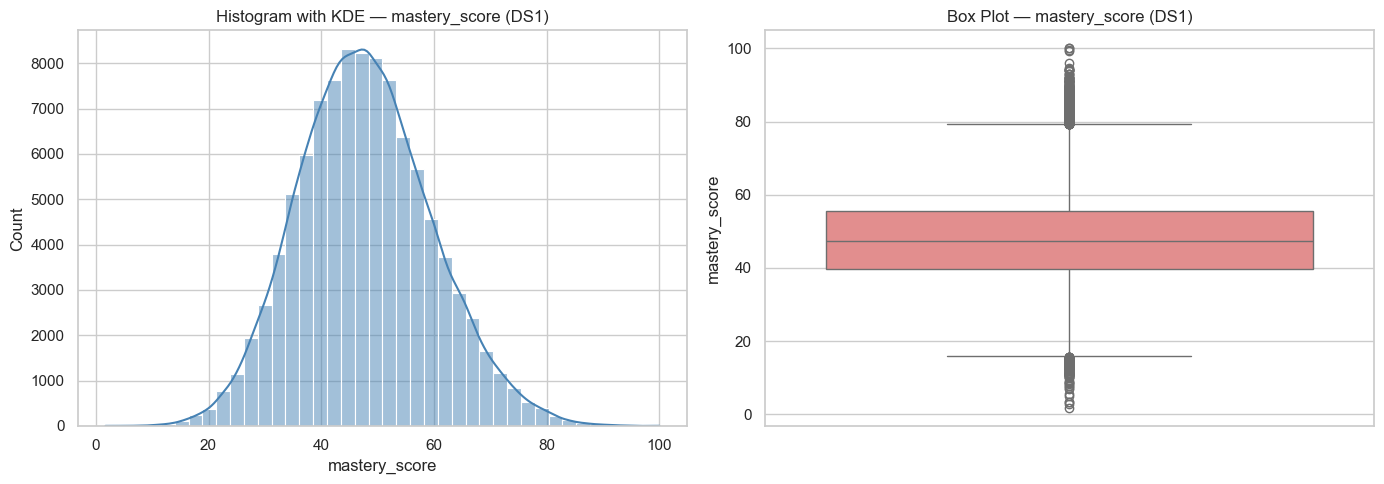

Skewness of 'mastery_score': 0.2148
  → Approximately symmetric distribution

IQR Outlier Bounds: [15.75, 79.35]
Number of outliers detected: 759


In [ ]:
col1 = 'mastery_score'
data1 = df1_clean[col1].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(data1, kde=True, ax=axes[0], color='steelblue', bins=40)
axes[0].set_title(f'Histogram with KDE — {col1} (DS1)')
axes[0].set_xlabel(col1)

# Box Plot
sns.boxplot(y=data1, ax=axes[1], color='lightcoral')
axes[1].set_title(f'Box Plot — {col1} (DS1)')

plt.tight_layout()
plt.show()

# Skewness
skew_val = data1.skew()
print(f"Skewness of '{col1}': {skew_val:.4f}")
if abs(skew_val) < 0.5:
    print("  → Approximately symmetric distribution")
elif skew_val > 0:
    print("  → Positively skewed (right tail)")
else:
    print("  → Negatively skewed (left tail)")

# Outlier identification using IQR
Q1, Q3 = data1.quantile(0.25), data1.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
outliers = data1[(data1 < lower) | (data1 > upper)]
print(f"\nIQR Outlier Bounds: [{lower:.2f}, {upper:.2f}]")
print(f"Number of outliers detected: {len(outliers)}")

### Dataset 2: Drug Dataset — `Na_to_K`

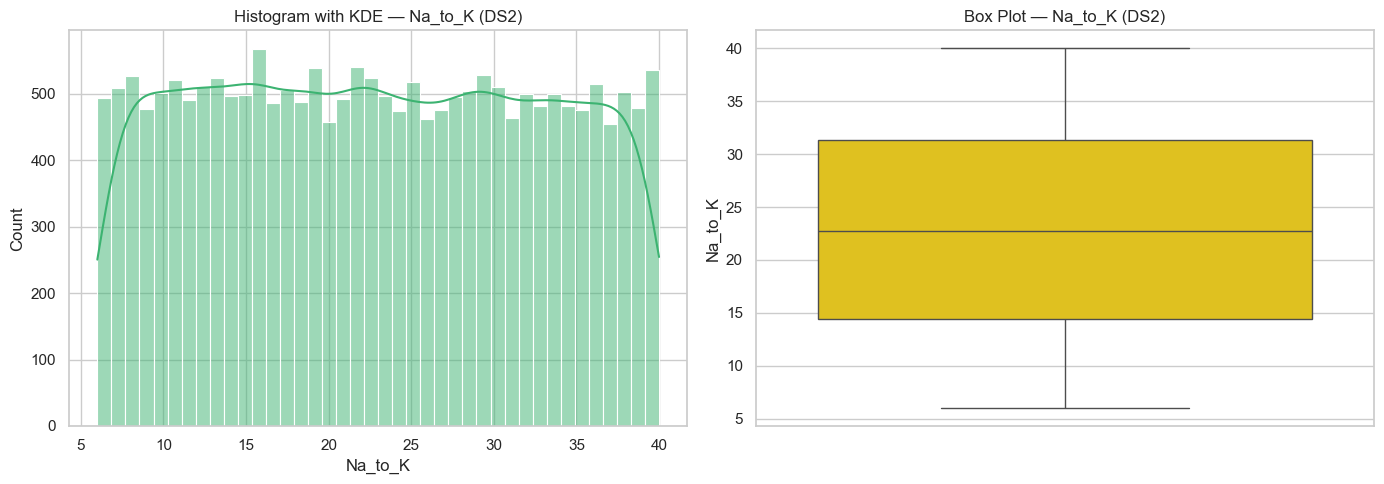

Skewness of 'Na_to_K': 0.0212
  → Approximately symmetric distribution

IQR Outlier Bounds: [-10.94, 56.72]
Number of outliers detected: 0


In [ ]:
col2 = 'Na_to_K'
data2 = df2_clean[col2].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(data2, kde=True, ax=axes[0], color='mediumseagreen', bins=40)
axes[0].set_title(f'Histogram with KDE — {col2} (DS2)')
axes[0].set_xlabel(col2)

# Box Plot
sns.boxplot(y=data2, ax=axes[1], color='gold')
axes[1].set_title(f'Box Plot — {col2} (DS2)')

plt.tight_layout()
plt.show()

# Skewness
skew_val2 = data2.skew()
print(f"Skewness of '{col2}': {skew_val2:.4f}")
if abs(skew_val2) < 0.5:
    print("  → Approximately symmetric distribution")
elif skew_val2 > 0:
    print("  → Positively skewed (right tail)")
else:
    print("  → Negatively skewed (left tail)")

# Outlier identification using IQR
Q1_2, Q3_2 = data2.quantile(0.25), data2.quantile(0.75)
IQR2 = Q3_2 - Q1_2
lower2, upper2 = Q1_2 - 1.5 * IQR2, Q3_2 + 1.5 * IQR2
outliers2 = data2[(data2 < lower2) | (data2 > upper2)]
print(f"\nIQR Outlier Bounds: [{lower2:.2f}, {upper2:.2f}]")
print(f"Number of outliers detected: {len(outliers2)}")

---
## Question 8 — Bivariate Analysis

### Dataset 1: Digital Learning Analytics — `mastery_score` vs `learning_efficiency_score`

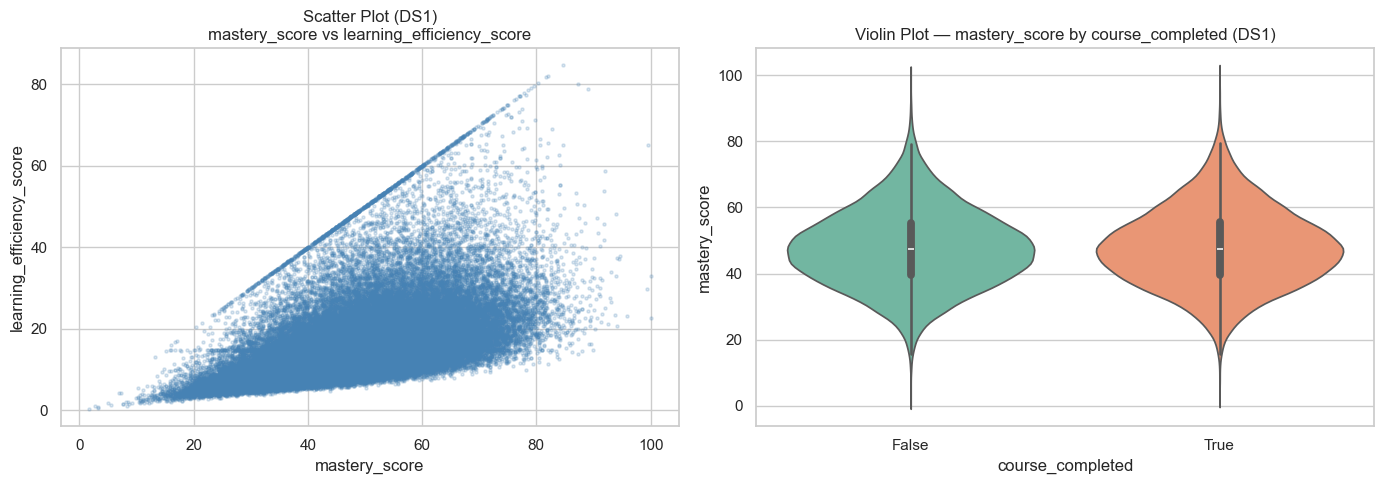

Pearson Correlation (mastery_score vs learning_efficiency_score): r = 0.5405, p = 0.0000e+00


In [ ]:
x_col1, y_col1 = 'mastery_score', 'learning_efficiency_score'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter Plot
axes[0].scatter(df1_clean[x_col1], df1_clean[y_col1],
                alpha=0.2, s=5, color='steelblue')
axes[0].set_xlabel(x_col1)
axes[0].set_ylabel(y_col1)
axes[0].set_title(f'Scatter Plot (DS1)\n{x_col1} vs {y_col1}')

# Violin Plot — efficiency score by course_completed
sns.violinplot(data=df1_clean, x='course_completed', y='mastery_score',
               ax=axes[1], palette='Set2')
axes[1].set_title('Violin Plot — mastery_score by course_completed (DS1)')

plt.tight_layout()
plt.show()

# Pearson Correlation
pearson_r, p_val = stats.pearsonr(
    df1_clean[x_col1].dropna(), df1_clean[y_col1].dropna()
)
print(f"Pearson Correlation ({x_col1} vs {y_col1}): r = {pearson_r:.4f}, p = {p_val:.4e}")

### Dataset 2: Drug Dataset — `Age` vs `Na_to_K`

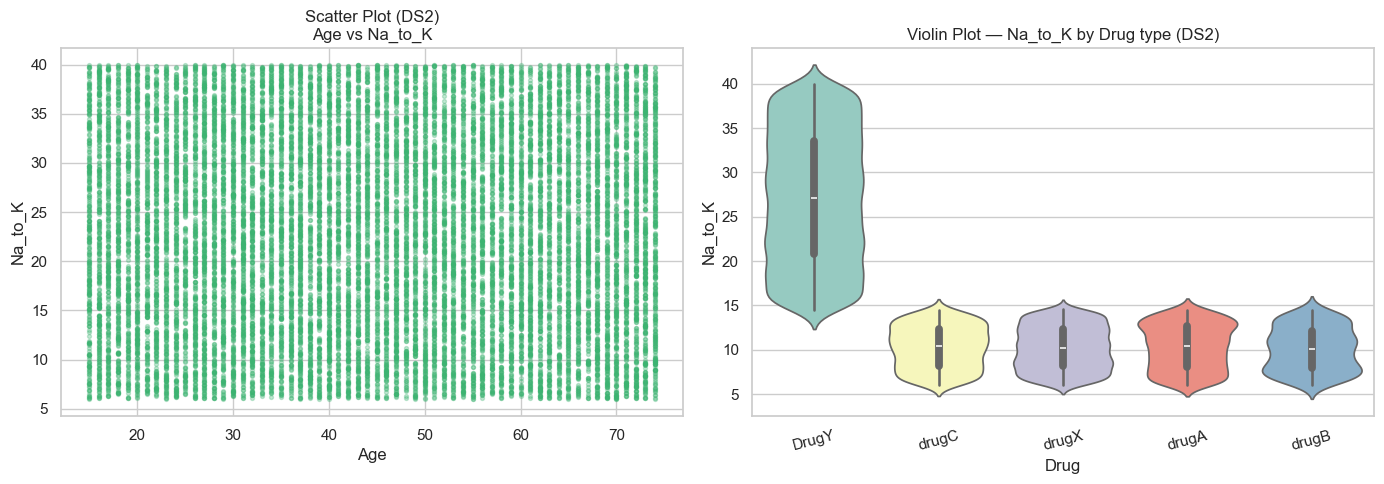

Pearson Correlation (Age vs Na_to_K): r = -0.0024, p = 7.3130e-01


In [ ]:
x_col2, y_col2 = 'Age', 'Na_to_K'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter Plot
axes[0].scatter(df2_clean[x_col2], df2_clean[y_col2],
                alpha=0.3, s=8, color='mediumseagreen')
axes[0].set_xlabel(x_col2)
axes[0].set_ylabel(y_col2)
axes[0].set_title(f'Scatter Plot (DS2)\n{x_col2} vs {y_col2}')

# Violin Plot — Na_to_K by Drug type
sns.violinplot(data=df2_clean, x='Drug', y='Na_to_K',
               ax=axes[1], palette='Set3')
axes[1].set_title('Violin Plot — Na_to_K by Drug type (DS2)')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Pearson Correlation
pearson_r2, p_val2 = stats.pearsonr(df2_clean[x_col2], df2_clean[y_col2])
print(f"Pearson Correlation ({x_col2} vs {y_col2}): r = {pearson_r2:.4f}, p = {p_val2:.4e}")

---
## Question 9 — Multivariate Analysis

### Dataset 1: Digital Learning Analytics

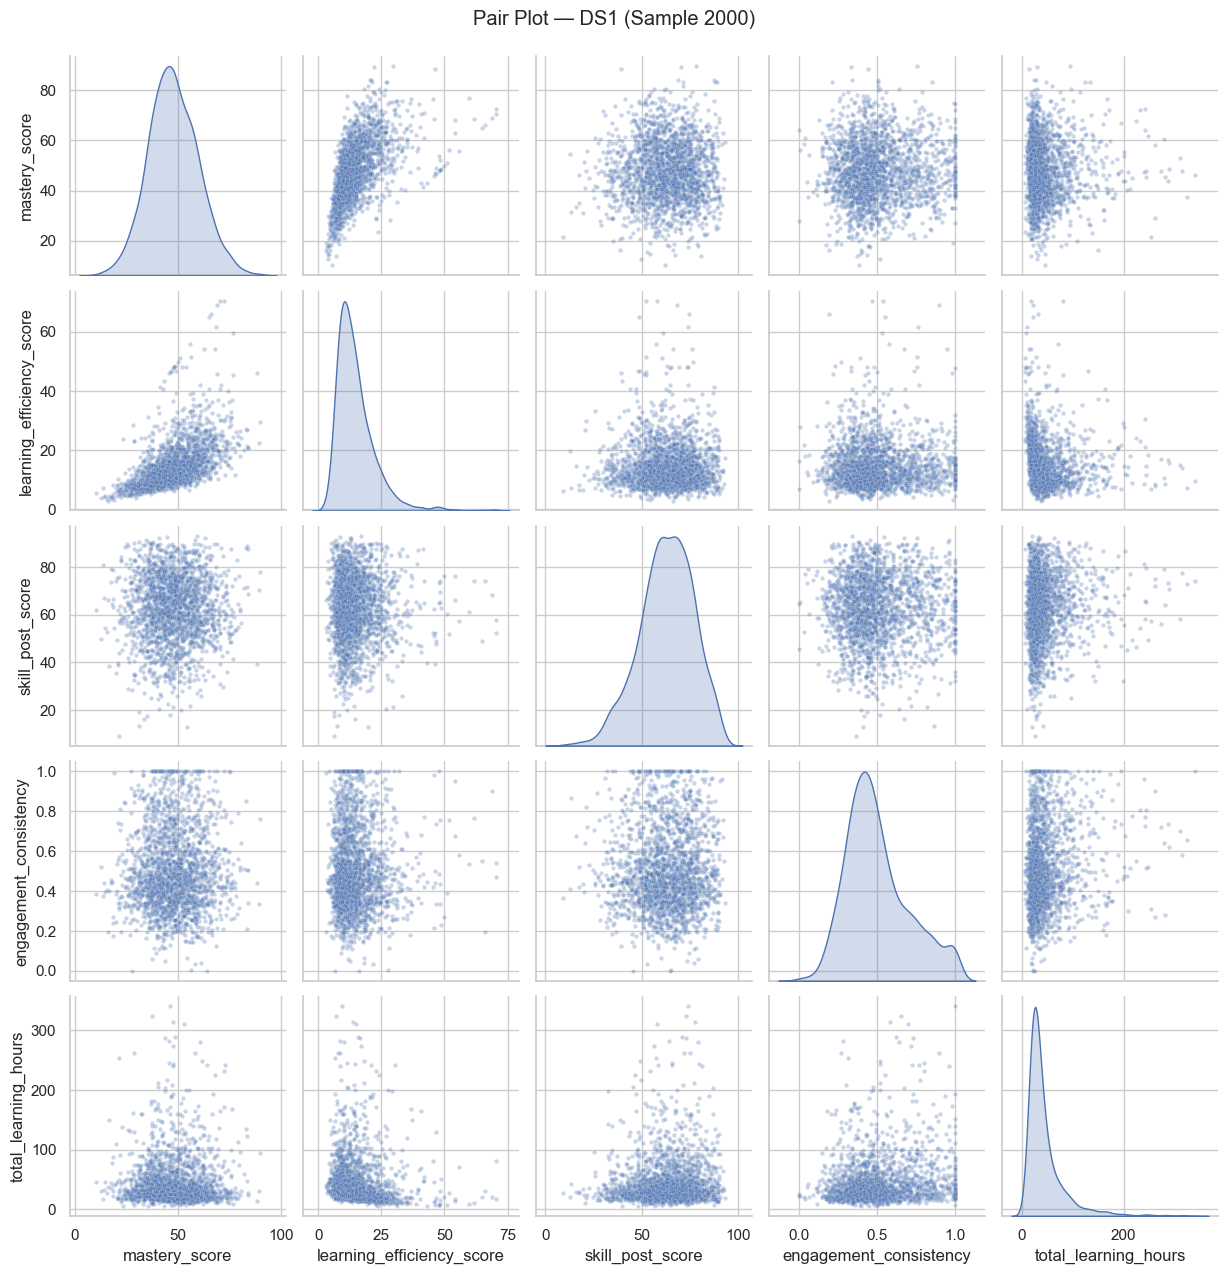

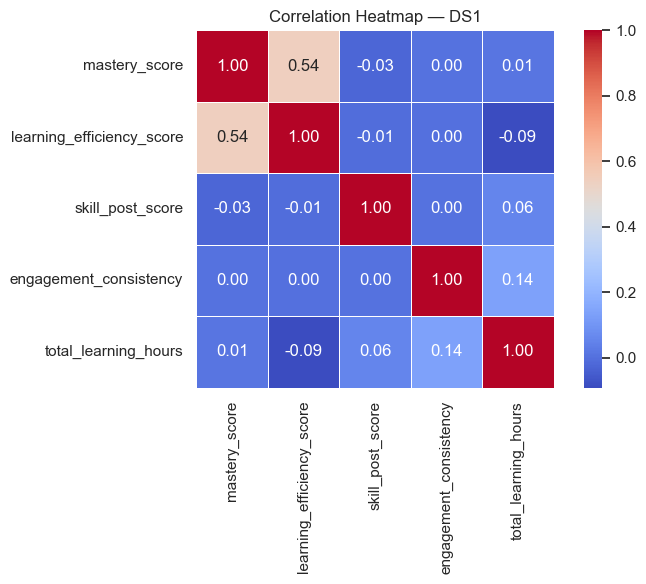

In [ ]:
# Select subset of numeric columns for pair plot
pair_cols1 = ['mastery_score', 'learning_efficiency_score',
              'skill_post_score', 'engagement_consistency', 'total_learning_hours']

# Pair Plot (sample 2000 rows for performance)
df1_sample = df1_clean[pair_cols1].sample(2000, random_state=0)
pair_plot1 = sns.pairplot(df1_sample, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10})
pair_plot1.figure.suptitle('Pair Plot — DS1 (Sample 2000)', y=1.02)
plt.show()

# Correlation Heatmap
corr1 = df1_clean[pair_cols1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr1, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, square=True)
plt.title('Correlation Heatmap — DS1')
plt.tight_layout()
plt.show()

### Dataset 2: Drug Dataset

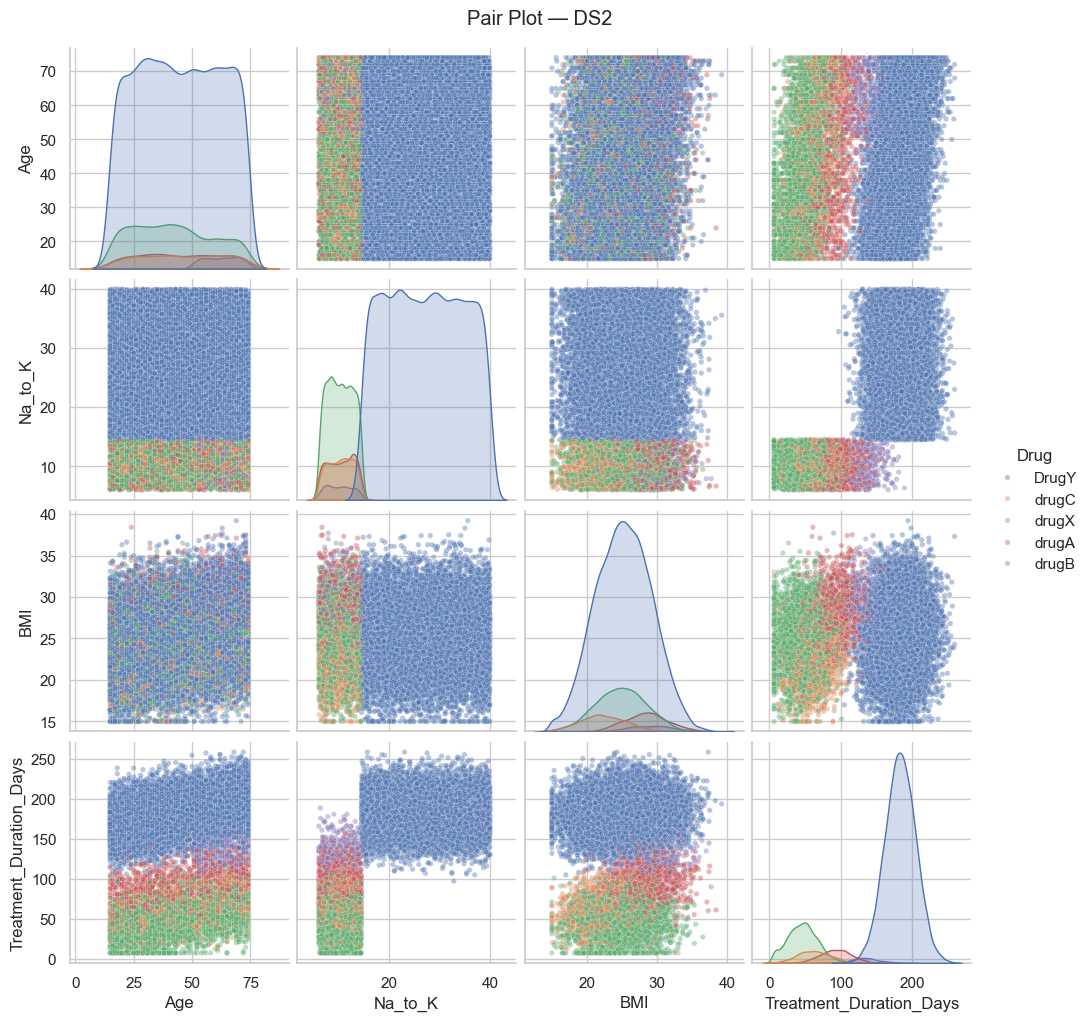

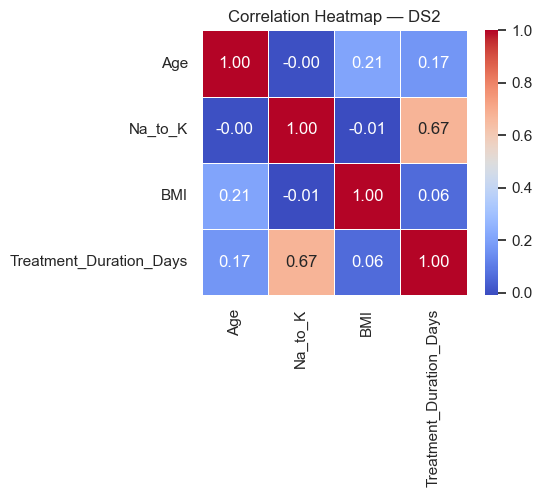

In [ ]:
# Numeric columns in DS2
pair_cols2 = ['Age', 'Na_to_K', 'BMI', 'Treatment_Duration_Days']

# Pair Plot
pair_plot2 = sns.pairplot(df2_clean[pair_cols2 + ['Drug']],
                          hue='Drug', diag_kind='kde',
                          plot_kws={'alpha': 0.4, 's': 15})
pair_plot2.figure.suptitle('Pair Plot — DS2', y=1.02)
plt.show()

# Correlation Heatmap
corr2 = df2_clean[pair_cols2].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr2, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, square=True)
plt.title('Correlation Heatmap — DS2')
plt.tight_layout()
plt.show()

---
## Question 10 — Outlier Detection & Feature Engineering

### Dataset 1: Digital Learning Analytics

[Z-Score] Outliers detected (|z| > 3): 4611 rows
[Isolation Forest] Outliers detected: 5000 rows
[LOF] Outliers detected: 5000 rows

--- Outlier Summary (DS1) ---


Total Outliers
zscore_outlier               4611
isoforest_outlier            5000
lof_outlier                  5000

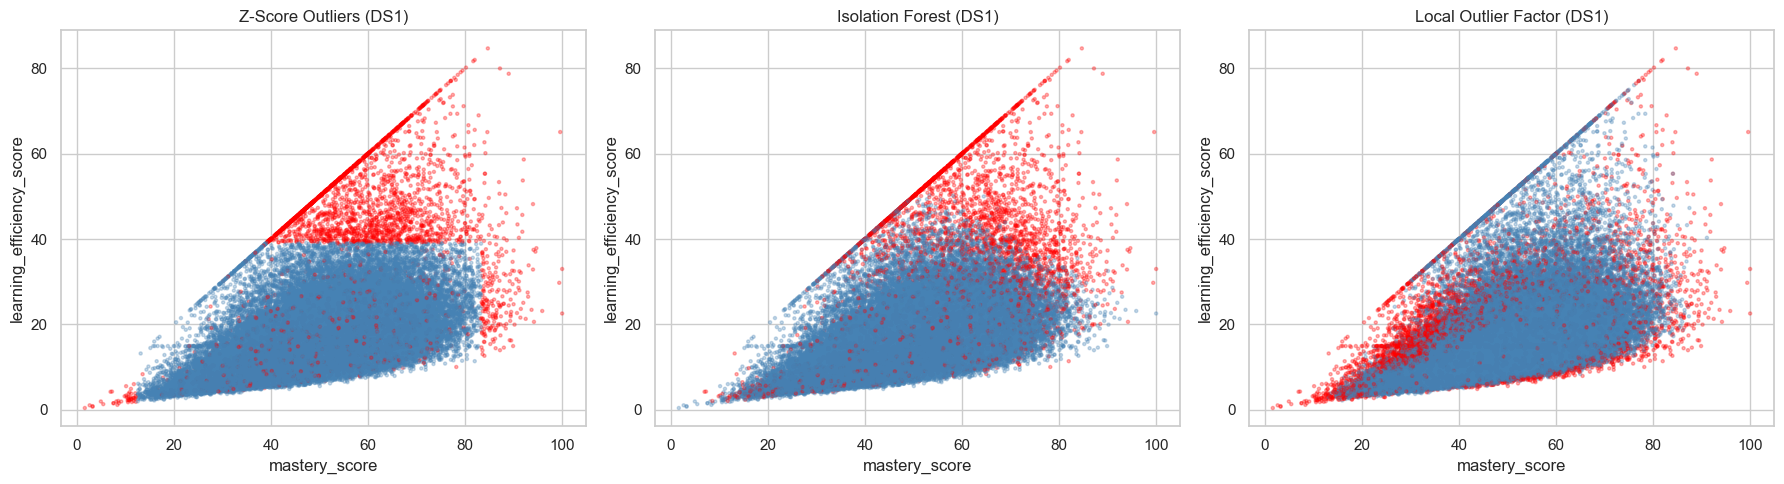

In [ ]:
feat_cols1 = ['mastery_score', 'learning_efficiency_score',
              'total_learning_hours', 'skill_post_score', 'engagement_consistency']
df1_feat = df1_clean[feat_cols1].dropna().copy()

# ── 1. Z-Score Method ──
z_scores = np.abs(stats.zscore(df1_feat))
zscore_mask = (z_scores > 3).any(axis=1)
print(f"[Z-Score] Outliers detected (|z| > 3): {zscore_mask.sum()} rows")
df1_feat['zscore_outlier'] = zscore_mask.astype(int)

# ── 2. Isolation Forest ──
iso = IsolationForest(contamination=0.05, random_state=0, n_estimators=100)
iso_labels = iso.fit_predict(df1_feat[feat_cols1])
df1_feat['isoforest_outlier'] = (iso_labels == -1).astype(int)
print(f"[Isolation Forest] Outliers detected: {(iso_labels == -1).sum()} rows")

# ── 3. Local Outlier Factor ──
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(df1_feat[feat_cols1])
df1_feat['lof_outlier'] = (lof_labels == -1).astype(int)
print(f"[LOF] Outliers detected: {(lof_labels == -1).sum()} rows")

# Summary
print("\n--- Outlier Summary (DS1) ---")
display(df1_feat[['zscore_outlier', 'isoforest_outlier', 'lof_outlier']].sum().to_frame('Total Outliers'))

# Visualize Z-score outliers on scatter
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors_z   = df1_feat['zscore_outlier'].map({0: 'steelblue', 1: 'red'})
colors_iso = df1_feat['isoforest_outlier'].map({0: 'steelblue', 1: 'red'})
colors_lof = df1_feat['lof_outlier'].map({0: 'steelblue', 1: 'red'})

for ax, colors, title in zip(axes,
                              [colors_z, colors_iso, colors_lof],
                              ['Z-Score Outliers', 'Isolation Forest', 'Local Outlier Factor']):
    ax.scatter(df1_feat['mastery_score'], df1_feat['learning_efficiency_score'],
               c=colors, alpha=0.3, s=5)
    ax.set_title(f'{title} (DS1)')
    ax.set_xlabel('mastery_score')
    ax.set_ylabel('learning_efficiency_score')

plt.tight_layout()
plt.show()

### Dataset 2: Drug Dataset

[Z-Score] Outliers detected (|z| > 3): 13 rows
[Isolation Forest] Outliers detected: 1000 rows
[LOF] Outliers detected: 1000 rows

--- Outlier Summary (DS2) ---


Total Outliers
zscore_outlier                 13
isoforest_outlier            1000
lof_outlier                  1000

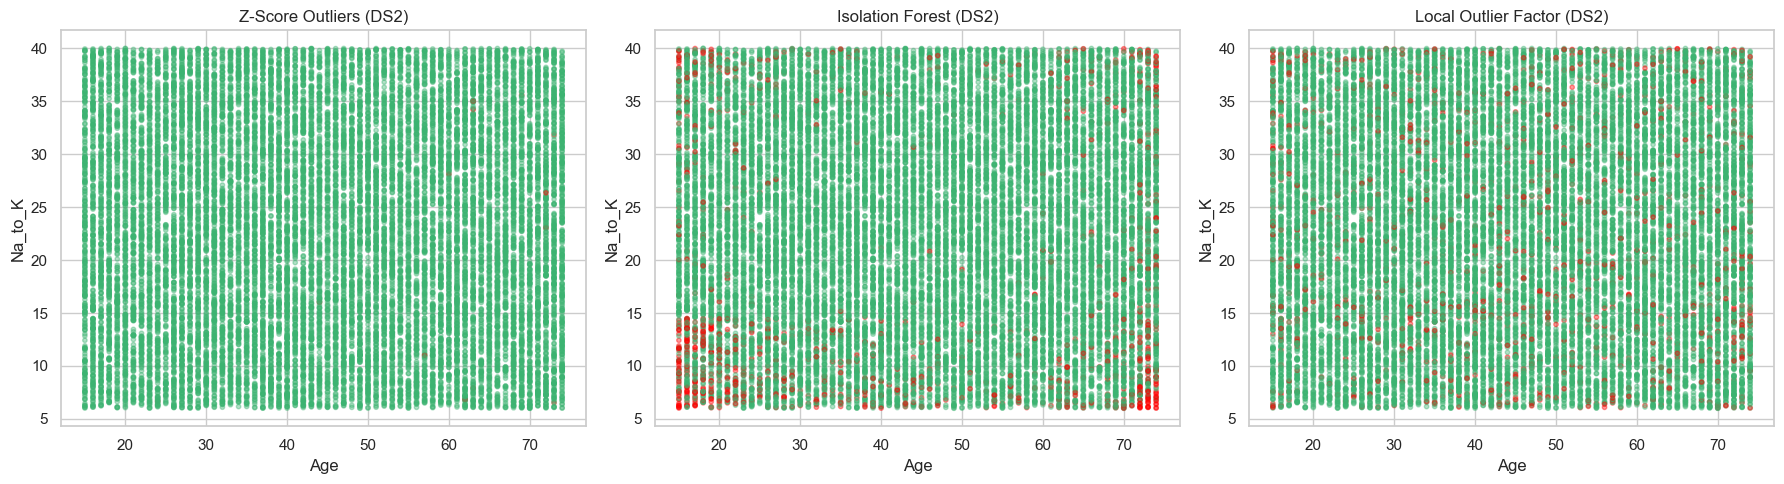

In [ ]:
feat_cols2 = ['Age', 'Na_to_K', 'BMI', 'Treatment_Duration_Days']
df2_feat = df2_clean[feat_cols2].dropna().copy()

# ── 1. Z-Score Method ──
z_scores2 = np.abs(stats.zscore(df2_feat))
zscore_mask2 = (z_scores2 > 3).any(axis=1)
print(f"[Z-Score] Outliers detected (|z| > 3): {zscore_mask2.sum()} rows")
df2_feat['zscore_outlier'] = zscore_mask2.astype(int)

# ── 2. Isolation Forest ──
iso2 = IsolationForest(contamination=0.05, random_state=0, n_estimators=100)
iso_labels2 = iso2.fit_predict(df2_feat[feat_cols2])
df2_feat['isoforest_outlier'] = (iso_labels2 == -1).astype(int)
print(f"[Isolation Forest] Outliers detected: {(iso_labels2 == -1).sum()} rows")

# ── 3. Local Outlier Factor ──
lof2 = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels2 = lof2.fit_predict(df2_feat[feat_cols2])
df2_feat['lof_outlier'] = (lof_labels2 == -1).astype(int)
print(f"[LOF] Outliers detected: {(lof_labels2 == -1).sum()} rows")

# Summary
print("\n--- Outlier Summary (DS2) ---")
display(df2_feat[['zscore_outlier', 'isoforest_outlier', 'lof_outlier']].sum().to_frame('Total Outliers'))

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors2_z   = df2_feat['zscore_outlier'].map({0: 'mediumseagreen', 1: 'red'})
colors2_iso = df2_feat['isoforest_outlier'].map({0: 'mediumseagreen', 1: 'red'})
colors2_lof = df2_feat['lof_outlier'].map({0: 'mediumseagreen', 1: 'red'})

for ax, colors, title in zip(axes,
                              [colors2_z, colors2_iso, colors2_lof],
                              ['Z-Score Outliers', 'Isolation Forest', 'Local Outlier Factor']):
    ax.scatter(df2_feat['Age'], df2_feat['Na_to_K'],
               c=colors, alpha=0.4, s=10)
    ax.set_title(f'{title} (DS2)')
    ax.set_xlabel('Age')
    ax.set_ylabel('Na_to_K')

plt.tight_layout()
plt.show()